# Principal Component Analysis for Financial Inclusion

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# pip install openpyxl

In [9]:
# 1. Cargar los datos desde un archivo Excel
data = pd.read_excel("C:/Users/Tobby/OneDrive/Desktop/Tesis general/Tesis Lenovo/Tesis-paper/Tesis data/Data inclusion financiera.xlsx")

# Convertir la columna "Fecha" al formato de fecha
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%y')

In [10]:
# 3. Aplicar diferencias logarítmicas multiplicadas por 400
numeric_data = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  # Convertir columnas numéricas
numeric_data 

,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
0,10.28,7.78,12.145887,1286199,10.866629,7.716501,4.002207,24.793048,23.305185,977
1,9.72,7.75,12.297343,1322741,10.282440,7.692056,4.214256,25.378728,23.449867,1016
2,9.65,7.56,13.205494,1350085,10.040474,7.997109,4.075549,25.160441,22.116769,1021
3,8.89,7.03,14.364746,1419039,10.085371,8.631039,4.339406,25.282033,21.638237,1050
4,7.78,6.90,12.291373,1446002,10.319630,8.710091,4.414169,24.849773,21.510888,1044
...,...,...,...,...,...,...,...,...,...,...
82,3.26,3.29,5.184749,7094999,17.668821,14.486573,3.215061,87.449075,85.149114,4341
83,2.68,3.06,5.051773,7234567,18.448586,14.509252,3.448350,85.912169,85.544000,4289
84,2.53,2.92,5.207329,7391416,19.768037,14.755661,3.440674,84.037848,84.836900,4267
85,2.72,2.89,5.376469,7577771,20.494660,14.782893,3.273696,83.341674,86.705278,4256


### Normalizamos las variables para que esten en una escala similar

In [ ]:
scaler = StandardScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(numeric_data),  # Normalizar solo los valores
    columns=numeric_data.columns  # Mantener nombres de columnas
)

In [29]:
normalized.index = data['Fecha'].values
normalized.index.name = 'Fecha'
normalized

,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
Fecha,,,,,,,,,,
2001-03-31,4.047296,2.919650,2.917588,-1.627806,-2.452921,-2.772578,-0.677523,-1.110549,-0.980749,-1.436736
2001-06-30,3.708066,2.903122,2.990770,-1.610266,-2.627876,-2.784717,-0.597170,-1.082836,-0.974516,-1.409869
2001-09-30,3.665662,2.798449,3.429579,-1.597141,-2.700341,-2.633235,-0.649731,-1.093165,-1.031947,-1.406424
2001-12-31,3.205279,2.506465,3.989716,-1.564044,-2.686895,-2.318442,-0.549746,-1.087411,-1.052562,-1.386445
2002-03-31,2.532876,2.434846,2.987885,-1.551102,-2.616738,-2.279187,-0.521416,-1.107865,-1.058048,-1.390579
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,-0.205195,0.446050,-0.445958,1.160362,-0.415771,0.589268,-0.975800,1.854216,1.683519,0.880774
2021-12-31,-0.556541,0.319340,-0.510210,1.227353,-0.182243,0.600530,-0.887399,1.781492,1.700531,0.844950
2022-03-31,-0.647406,0.242212,-0.435047,1.302639,0.212912,0.722890,-0.890308,1.692803,1.670068,0.829794


### Observamos los gráficos de las variables de las dimensiones de inclusión financiera

<Figure size 200x100 with 0 Axes>

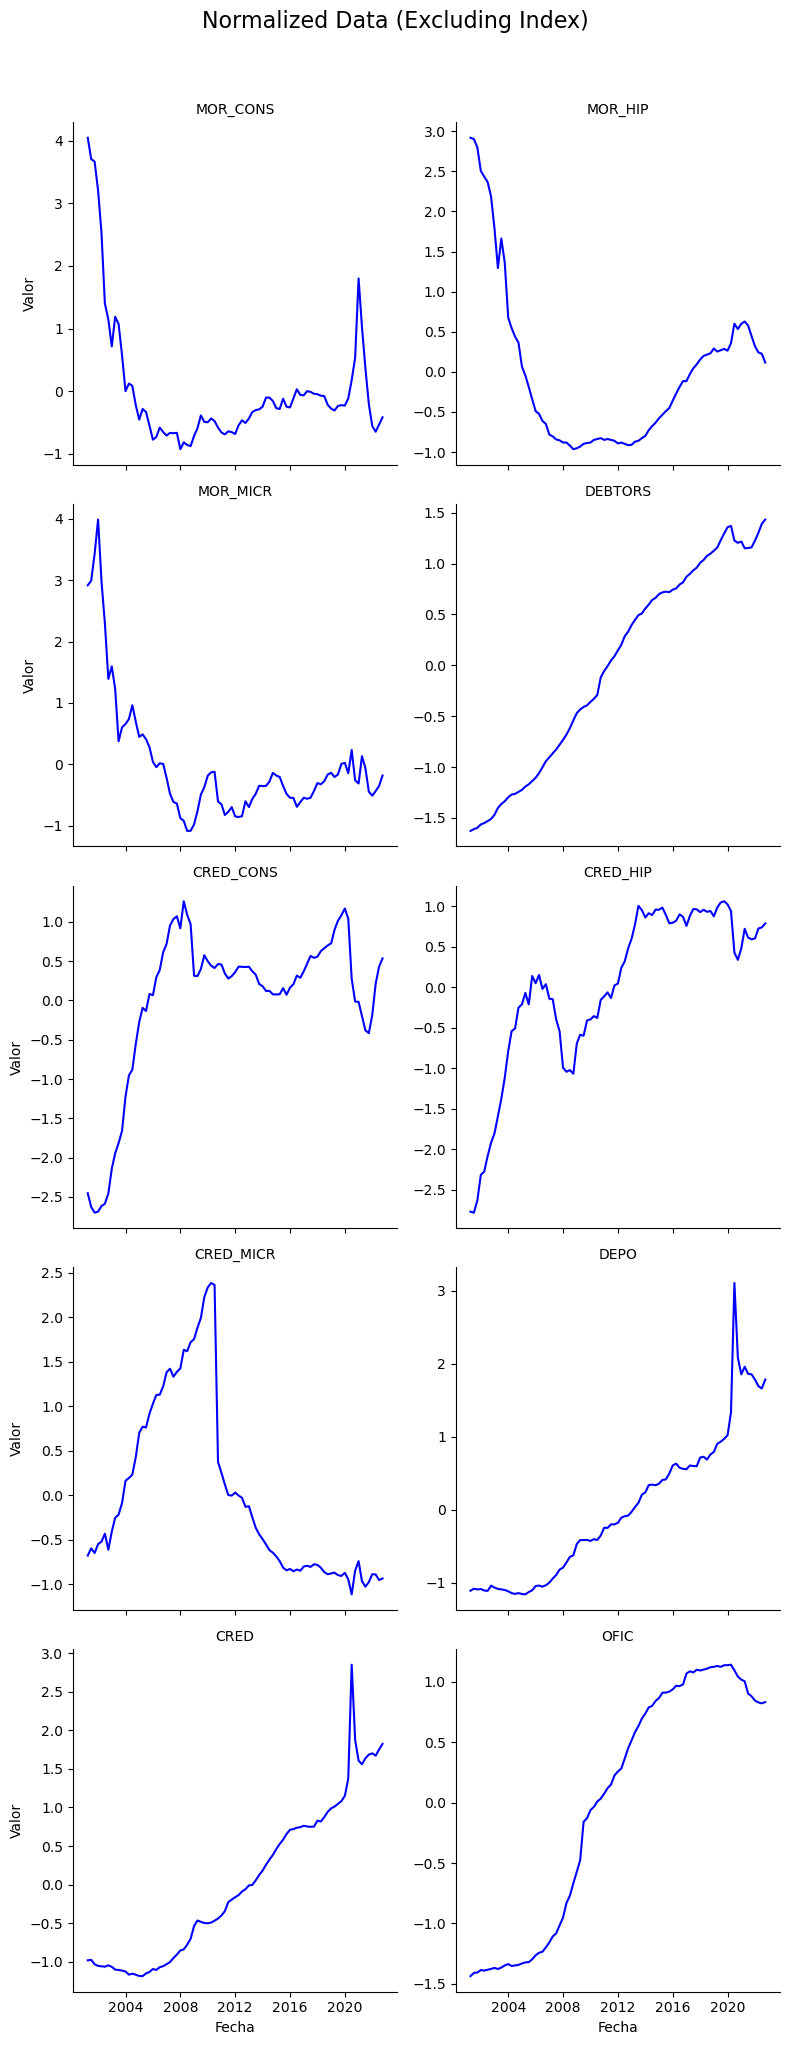

In [30]:
# Transforma el DataFrame a formato largo
normalized_long = normalized.reset_index().melt(id_vars='Fecha', var_name='Variable', value_name='Valor')

# Crear la figura con el gráfico
plt.figure(figsize=(2,1))
g1 = sns.FacetGrid(normalized_long, col='Variable', col_wrap=2, sharey=False, sharex=True, height=4)
g1.map(sns.lineplot, 'Fecha', 'Valor', color='blue')
g1.set_titles("{col_name}")
g1.set_axis_labels("Fecha", "Valor")
g1.fig.suptitle("Normalized Data (Excluding Index)", fontsize=16, y=1.02)
g1.tight_layout()

# Mostrar el gráfico
plt.show()

### Ahora estimamos el Findex mediante PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
# Renombrar log_diff_normalized a data_pca
data_pca = normalized.iloc[:, :]  # Usar 'normalized' como la data a analizar

# Estimar el PCA
pca = PCA()
principal_components = pca.fit_transform(data_pca)

# Convertir componentes principales a DataFrame
pca_data = pd.DataFrame(
    principal_components,
    columns=[f"PC{i+1}" for i in range(principal_components.shape[1])],
    index=data_pca.index
)

In [31]:
# Imprimir la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje
print("Varianza explicada por cada componente principal (%):")
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var:.2f}%")

# Imprimir la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada (%):")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {cum_var:.2f}%")

Varianza explicada por cada componente principal (%):
PC1: 59.97%
PC2: 31.60%
PC3: 3.40%
PC4: 1.77%
PC5: 1.37%
PC6: 0.94%
PC7: 0.51%
PC8: 0.38%
PC9: 0.04%
PC10: 0.02%

Varianza explicada acumulada (%):
PC1: 59.97%
PC2: 91.57%
PC3: 94.97%
PC4: 96.74%
PC5: 98.11%
PC6: 99.04%
PC7: 99.55%
PC8: 99.94%
PC9: 99.98%
PC10: 100.00%


In [32]:
# Mostrar los coeficientes de cada variable en los componentes principales
coefficients = pd.DataFrame(
    pca.components_,
    columns=data_pca.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\nCoeficientes de las variables en los componentes principales:")
coefficients


Coeficientes de las variables en los componentes principales:


,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
PC1,-0.255413,-0.247695,-0.325729,0.381839,0.325855,0.380601,-0.122758,0.330138,0.332182,0.368872
PC2,-0.398773,-0.426120,-0.298143,-0.189342,0.290659,0.002737,0.486587,-0.288275,-0.302817,-0.196481
PC3,0.237583,0.073333,-0.005605,0.079073,0.179762,-0.479469,0.631171,0.408526,0.322707,0.016676
PC4,0.612135,-0.295389,0.262944,0.140982,0.282486,0.161144,0.135365,-0.308609,-0.227330,0.421915
PC5,-0.186913,0.289025,0.599691,-0.046971,0.461941,0.422667,0.151010,0.067850,0.098816,-0.300803
PC6,0.127129,0.351672,-0.326698,0.040980,0.660870,-0.340836,-0.376837,-0.187381,-0.083226,-0.121620
PC7,-0.523513,0.253947,0.292794,0.251279,-0.024950,-0.348820,0.090240,-0.288728,-0.072129,0.541819
PC8,0.126673,0.618156,-0.427486,0.034814,-0.155429,0.426656,0.391596,-0.169512,-0.088148,0.147767
PC9,0.039663,-0.051696,0.013949,0.846863,-0.142629,-0.026473,0.068516,-0.153879,-0.099622,-0.468018
PC10,0.042491,-0.089158,-0.028496,-0.082490,-0.044284,0.007008,0.021620,-0.608507,0.776241,-0.085559


### OJO: Queda pendiente interpretar los coeficientes de cada variable y su peso en cada componente

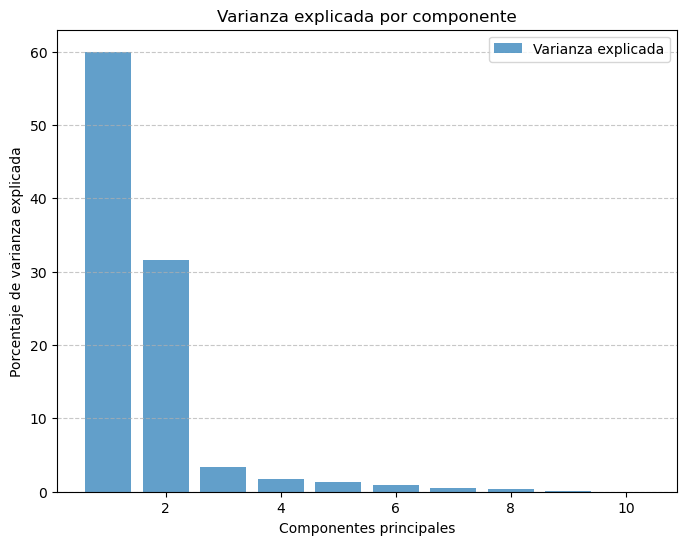

In [34]:
# Gráficos para analizar los resultados
plt.figure(figsize=(8, 6))
plt.bar(
    range(1, len(explained_variance_ratio) + 1), 
    explained_variance_ratio, 
    alpha=0.7, 
    label='Varianza explicada'
)
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por componente')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
print(principal_components[:1])

[[-6.32258366 -3.57052315  0.69725495  0.88082085 -0.23391135  0.56511339
  -0.3520288   0.00899234 -0.01038854  0.0747513 ]]


In [38]:
pca.components_

array([[-0.25541339, -0.24769451, -0.32572928,  0.38183853,  0.32585495,
         0.38060147, -0.1227581 ,  0.33013809,  0.33218192,  0.36887225],
       [-0.39877299, -0.42611965, -0.29814281, -0.18934182,  0.29065897,
         0.00273739,  0.4865872 , -0.28827543, -0.30281683, -0.19648079],
       [ 0.23758288,  0.07333332, -0.00560525,  0.07907328,  0.17976197,
        -0.47946891,  0.63117098,  0.40852562,  0.32270683,  0.01667634],
       [ 0.61213543, -0.29538854,  0.26294416,  0.14098168,  0.28248559,
         0.16114449,  0.13536505, -0.30860949, -0.22733043,  0.42191476],
       [-0.18691281,  0.28902539,  0.59969129, -0.0469708 ,  0.46194119,
         0.42266699,  0.15101036,  0.06784954,  0.0988158 , -0.30080347],
       [ 0.12712875,  0.35167236, -0.32669828,  0.04098027,  0.66086987,
        -0.34083592, -0.37683656, -0.18738136, -0.08322574, -0.12162027],
       [-0.52351291,  0.25394727,  0.29279375,  0.25127868, -0.02494985,
        -0.34882017,  0.09024027, -0.28872807

### Parece que el código interpreta de manera diferente pca.components y principal_components, queda pendiente averiguar por qué y verificarlo utilizando STATA

#### Empleamos el PC1 y PC2 que son los que explican el 91% de la variación de los datos. Utilizaremos un promedio ponderado de los coeficientes de cada componente para hallar los pesos relativos de cada variables y armar el Findex. Para ello, multiplicamos cada PC por su varianza respectiva, sumamos los resultados y divimos entre el total de la varianza explicada. 

In [47]:
# Coeficientes de los dos primeros componentes
coefficients = pca.components_[:2]
print(coefficients)
# Varianza explicada de los dos primeros componentes
explained_variance_ratio = pca.explained_variance_ratio_[:2]
print(explained_variance_ratio)

[[-0.25541339 -0.24769451 -0.32572928  0.38183853  0.32585495  0.38060147
  -0.1227581   0.33013809  0.33218192  0.36887225]
 [-0.39877299 -0.42611965 -0.29814281 -0.18934182  0.29065897  0.00273739
   0.4865872  -0.28827543 -0.30281683 -0.19648079]]
[0.59971484 0.31601113]


In [53]:
# Calcular el peso de cada componente en función de la varianza explicada
# Primero, multiplicamos cada componente por su varianza explicada
weighted_coefficients = coefficients.T * explained_variance_ratio

# Segundo, calculamos la suma total de varianza explicada de los dos componentes
total_explained_variance = np.sum(explained_variance_ratio)

# Tercero, hallamos los pesos relativos de cada variable. Cada peso es la proporción de la varianza explicada por cada componente
weights = np.sum(weighted_coefficients, axis=1) / total_explained_variance
print(weights)

# Por último, construímos el índice ponderado
index_ponderado = np.dot(normalized, weights)
index_df = pd.DataFrame(index_ponderado, columns=["FINDEX"], index=normalized.index)
print(index_df)

[-0.30488586 -0.30926787 -0.31620937  0.18472787  0.31370904  0.25020301
  0.08752303  0.11672757  0.11304795  0.17377256]
              FINDEX
Fecha               
2001-03-31 -5.372865
2001-06-30 -5.326509
2001-09-30 -5.414071
2001-12-31 -5.260868
2002-03-31 -4.683950
...              ...
2021-09-30  0.771391
2021-12-31  1.021414
2022-03-31  1.201006
2022-06-30  1.231756
2022-09-30  1.255756

[87 rows x 1 columns]


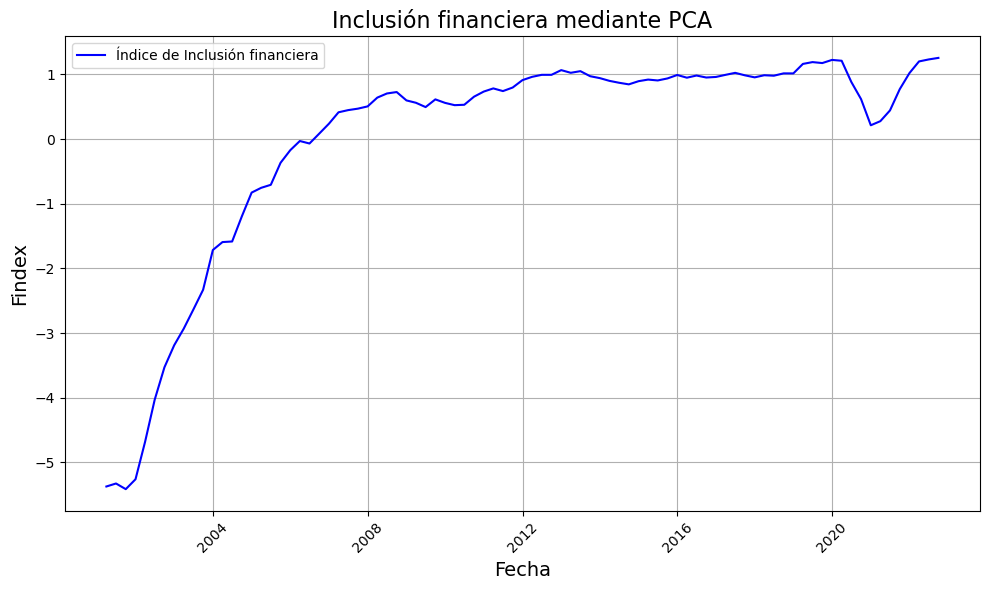

In [55]:
# Graficar el índice
plt.figure(figsize=(10, 6))
plt.plot(index_df.index, index_df['FINDEX'], color='blue', label='Índice de Inclusión financiera')

# Añadir título y etiquetas
plt.title('Inclusión financiera mediante PCA', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Findex', fontsize=14)

# Mejorar el formato de las fechas en el eje x
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### A la fecha (21/04/25) utilizamos estos datos para sacar variaciones porcentuales e introducirlas en el modelo empírico ya que utilizando el índice reescalado mediante min-max produce estimaciones poco confiables. Se sospecha que es por la escala del 0 al 1 del índice realzado por min-max.

#### De igual modo, es posible que empleando menos dimensiones de las propuestas y construir un índice distinto podría mejorar los resultados, queda pendiente averiguarlo.

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# Realizamos el ajuste y la transformación para la columna de interés
# index_df['Inclusión financiera'] = scaler.fit_transform(index_df[['Inclusión financiera']])

# Verificar el resultado
# print(index_df.head())

In [57]:
# Para hacer el gráfico del FINDEX reescalado con min-max copiar el codigo de arriba

# Comparación del FINDEX con las otras variables

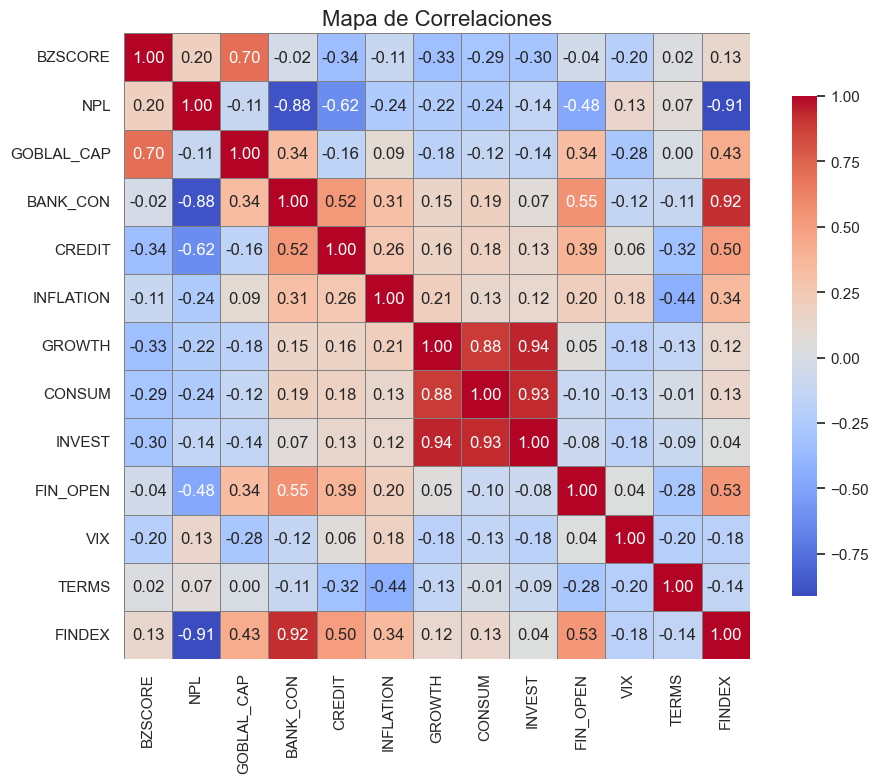

In [60]:
# Insertamos los datos para graficar
new_data = pd.read_excel('Data final 1.xlsx')
new_data['Fecha'] = pd.to_datetime(new_data['Fecha'], format='%d/%m/%y')
new_data.set_index('Fecha', inplace=True)

# Añadir 'index_df' a la data como una columna
new_data['FINDEX'] = index_df['FINDEX']

# Utilizaremos gráfico de correlaciones y graficamos mediante un mapa de calor
correlation_matrix = new_data.corr()

plt.figure(figsize=(10, 8))
sns.set(style="white", palette="muted")
sns.heatmap(
    correlation_matrix,
    annot=True,               # Mostrar los valores de correlación
    cmap="coolwarm",          # Paleta de colores
    fmt=".2f",                # Formato de los números
    linewidths=0.5,           # Líneas que separan las celdas
    linecolor='gray',         # Color de las líneas
    square=True,              # Forma cuadrada para el mapa
    cbar_kws={'shrink': 0.8}  # Reducir tamaño de la barra de color
)

plt.title("Mapa de Correlaciones", fontsize=16)
plt.tight_layout()  # Ajustar el layout para mejor visibilidad
plt.show()

In [ ]:
# Guardar los datos en un archivo Excel
# new_data.to_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data final findex.xlsx', index=True)

### Queda pendiente analizar el mapa de calor con variaciones porcentuales y sin incluir las variables que finalmente no fueron utilizadas en el modelo empírico.

### Asi mismo, es necesario revisar el paper donde se emplea el estimador Areballo-Bond para encontrar el conjunto de variables que optimiza las estimaciones a fin de comparar resultados entre diferentes modelos.